# Topic modeling based on Airbnb Reviews
Gensim LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [37]:
import pandas as pd
reviews = pd.read_csv('ai_data.csv')
pd.set_option('display.max_colwidth', 300)

reviews = reviews.drop(columns=['ID'])


(105, 2)

In [8]:
#remove html tags in the text with regular expression
reviews['Question'] = reviews['Question'].str.replace(r'<[^>]+>', ' ', regex=True)
#remove special characters and line breaks in the text with regular expression
reviews['Question'] = reviews['Question'].str.replace(r'([^\s\w_])+', ' ', regex=True)
reviews['Question'] = reviews['Question'].str.replace(r'[\n\r]', ' ', regex=True)
#remove special characters and line breaks in the text with regular expression
reviews['Question'] = reviews['Question'].str.replace(r'\d+', ' ', regex=True)
reviews.head(10)

,Question,Answer
0,What is artificial intelligence,Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and learn like humans.
1,What are the two types of AI,The two types of AI are narrow AI (also known as weak AI) and general AI (also known as strong AI).
2,What is narrow AI,Narrow AI is AI that is designed and trained for a particular task or set of tasks. It operates within a limited context and cannot perform tasks outside.
3,What is general AI,"General AI is AI that has the ability to understand, learn, and apply its intelligence across a wide range of tasks, similar to human intelligence."
4,What are some examples of narrow AI,"Some examples of narrow AI include virtual personal assistants (e.g., Siri, Alexa), recommendation systems, and image recognition software."
5,What are some challenges in AI,"Some challenges in AI include ethical considerations, job displacement, and ensuring AI systems are transparent and accountable."
6,What is machine learning,Machine learning is a subset of AI that allows computers to learn from data and improve over time without being explicitly programmed.
7,What are some popular machine learning algorithms,"Some popular machine learning algorithms include linear regression, logistic regression, decision trees, random forests, support vector machines (SVM), and neural networks."
8,What is deep learning,Deep learning is a subset of machine learning that uses neural networks with many layers to learn complex patterns in large amounts of data.
9,What are some applications of AI,"Some applications of AI include natural language processing (NLP), computer vision, autonomous vehicles, healthcare, and finance."


In [9]:
#further clean text with what's already used
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk

def tokenizer(description):
    #tokenize to extract words
    description = description.lower()
    description = re.sub('[^a-zA-Z0-9]', ' ', description)
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    words = tokenizer.tokenize(description)
    tokenized_words = ' '.join(words)
    return tokenized_words

def remove_stopwords(words):
    tokens = words.split(' ')
    stop = set(stopwords.words('english'))
    filtered_words = ' '.join([w for w in tokens if not w in stop])
    return filtered_words

def get_part_of_speech_tags(token):
    
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    tag = nltk.pos_tag([token])[0][1][0].upper()
    
    return tag_dict.get(tag, wordnet.NOUN)

def postag_lemmentization(words):
    #Your code to implement WordNet lemmatizer with POS tags in column description_clean
    token_list = words.split(' ')
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = ' '.join([lemmatizer.lemmatize(token, get_part_of_speech_tags(token)) for token in token_list])
    return lemmatized_words

In [10]:
reviews['Question'] = reviews['Question'].apply(tokenizer)
reviews['Question'] = reviews['Question'].apply(remove_stopwords)
reviews['Question'] = reviews['Question'].apply(postag_lemmentization)
reviews.head()

,Question,Answer
0,artificial intelligence,Artificial intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and learn like humans.
1,two type ai,The two types of AI are narrow AI (also known as weak AI) and general AI (also known as strong AI).
2,narrow ai,Narrow AI is AI that is designed and trained for a particular task or set of tasks. It operates within a limited context and cannot perform tasks outside.
3,general ai,"General AI is AI that has the ability to understand, learn, and apply its intelligence across a wide range of tasks, similar to human intelligence."
4,example narrow ai,"Some examples of narrow AI include virtual personal assistants (e.g., Siri, Alexa), recommendation systems, and image recognition software."


In [ ]:
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')

In [11]:
!pip install wordcloud

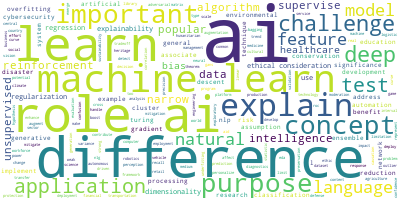

In [12]:
#word cloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Join the different processed comments together.
text_string = ','.join(list(reviews['Question'].values))
# Create a WordCloud object
#wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=0, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(text_string)
# Visualize the word cloud
wordcloud.to_image()

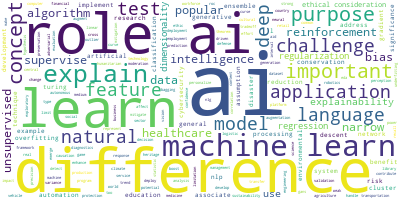

In [14]:
#word cloud
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Join the different processed comments together.
text_string = ','.join(list(reviews['Question'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='black')
#wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=0, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(text_string)
# Visualize the word cloud
wordcloud.to_image()

In [15]:
import gensim
from gensim.utils import simple_preprocess

def text_to_words(texts):
    return [[word for word in simple_preprocess(str(text), deacc=True)]
            for text in texts]

text = reviews.Question.values.tolist()
text_words = text_to_words(text)
print(text_words[0])

['artificial', 'intelligence']


In [ ]:
#data = reviews.comments.values.tolist()
#data_words = [[word for word in doc.split()] for doc in data]
#data_words[0]

In [17]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

# Create Dictionary
word_dict = corpora.Dictionary(text_words)
word_dict.filter_extremes(no_below=2, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [word_dict.doc2bow(text) for text in texts]

# View
print(corpus_vec[0])

[(0, 1), (1, 1)]


In [29]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_vec, id2word=word_dict, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(0,
  '0.098*"test" + 0.066*"regularization" + 0.066*"purpose" + 0.066*"turing" + '
  '0.066*"assumption" + 0.066*"feature" + 0.066*"regression" + '
  '0.035*"technique" + 0.035*"narrow" + 0.035*"general" + 0.035*"significance" '
  '+ 0.035*"ethical" + 0.035*"automation" + 0.035*"consideration" + '
  '0.035*"benefit" + 0.035*"important" + 0.035*"use" + 0.035*"explainability" '
  '+ 0.003*"application" + 0.003*"deep"'),
 (1,
  '0.059*"application" + 0.059*"consideration" + 0.059*"address" + '
  '0.059*"ethical" + 0.059*"system" + 0.059*"regression" + 0.059*"example" + '
  '0.059*"research" + 0.059*"classification" + 0.059*"development" + '
  '0.059*"disaster" + 0.059*"deep" + 0.059*"automation" + 0.005*"explain" + '
  '0.005*"important" + 0.005*"feature" + 0.005*"narrow" + '
  '0.005*"explainability" + 0.005*"popular" + 0.005*"healthcare"'),
 (2,
  '0.109*"model" + 0.109*"natural" + 0.109*"language" + 0.109*"narrow" + '
  '0.057*"nlp" + 0.057*"generative" + 0.057*"processing" + 0.057*"

Use TF-IDF

In [30]:
import gensim.corpora as corpora
from gensim.models import TfidfModel

# Create Dictionary
dict_word = corpora.Dictionary(text_words)
dict_word.filter_extremes(no_below=2, no_above=0.1, keep_n=2000)
# Create Corpus
texts = text_words
# Term Count Frequency
corpus_vec = [dict_word.doc2bow(text) for text in texts]

model = TfidfModel(corpus=corpus_vec, id2word=dict_word)  # fit model
corpus_tfidf = [model[c] for c in corpus_vec]  # apply model to corpus document

# View
print(corpus_tfidf[0])

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [31]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaModel(corpus=corpus_tfidf, id2word=dict_word, num_topics=num_topics, iterations=20)
# Print the Keyword in the 30 topics
pprint(lda_model.print_topics(num_words=20))

[(0,
  '0.104*"challenge" + 0.080*"popular" + 0.079*"data" + 0.076*"deep" + '
  '0.061*"purpose" + 0.054*"language" + 0.041*"regularization" + '
  '0.040*"natural" + 0.040*"bias" + 0.039*"classification" + 0.038*"implement" '
  '+ 0.038*"system" + 0.030*"explain" + 0.028*"processing" + 0.028*"nlp" + '
  '0.024*"disaster" + 0.023*"technique" + 0.004*"application" + '
  '0.004*"healthcare" + 0.004*"reinforcement"'),
 (1,
  '0.053*"feature" + 0.052*"generative" + 0.052*"risk" + 0.052*"network" + '
  '0.052*"associate" + 0.050*"purpose" + 0.045*"implement" + 0.045*"education" '
  '+ 0.041*"healthcare" + 0.041*"explainability" + 0.040*"research" + '
  '0.040*"development" + 0.039*"challenge" + 0.037*"ethical" + '
  '0.037*"consideration" + 0.036*"important" + 0.036*"concept" + '
  '0.006*"application" + 0.006*"supervise" + 0.006*"bias"'),
 (2,
  '0.095*"unsupervised" + 0.095*"healthcare" + 0.095*"overfitting" + '
  '0.073*"general" + 0.070*"research" + 0.070*"development" + 0.067*"narrow" +

Visualize from models

In [22]:
!pip install pyLDAvis

  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/06/4d/8d2dd5d81afdea2aa790860d5c7e12f80154923ba827e3fa36759f0bf2cd/FuzzyTM-2.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/f0/fe/b899a3d9a18c9a44a35155c79a4c152cb85990ea38ce6ab7ed73e5caa1b9/pyFUME-0.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for simpful from https://files.pythonhosted.org/packages/9d/0e/aebc2fb0b0f481994179b2ee2b8e6bbf0894d971594688c018375e7076ea/simpful-2.12.0-py3-none-any.whl.metadata

In [32]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dict_word)
pyLDAvis.display(LDAvis_prepared)

In [33]:
lda_model.show_topic(0, topn=10)

[('challenge', 0.10396121),
 ('popular', 0.08045341),
 ('data', 0.079080835),
 ('deep', 0.07607865),
 ('purpose', 0.061050445),
 ('language', 0.053752095),
 ('regularization', 0.041445497),
 ('natural', 0.039872628),
 ('bias', 0.039872505),
 ('classification', 0.039120648)]

In [25]:
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from matplotlib import pyplot as plt
# Generate a word cloud image for given topic
def draw_word_cloud(n):
    topic_words = dict(lda_model.show_topic(n, topn=50))
    words = " ".join
    wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate_from_frequencies(topic_words)
    # Visualize the word cloud
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

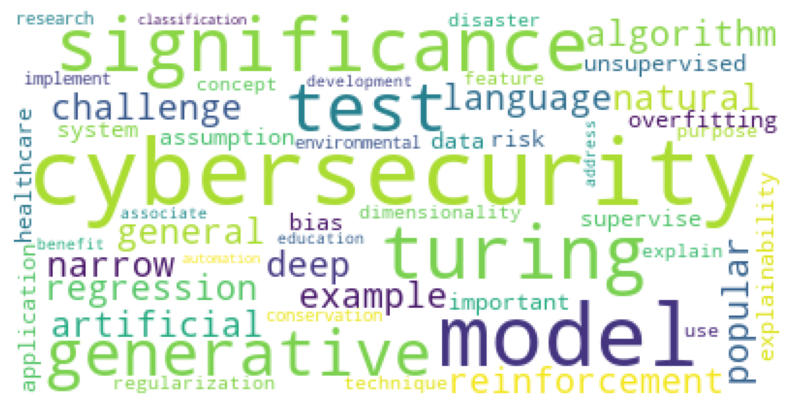

In [26]:
draw_word_cloud(0)

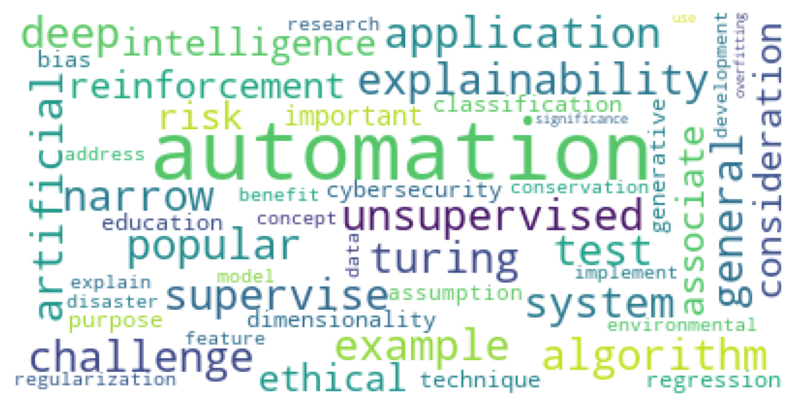

In [27]:
draw_word_cloud(1)

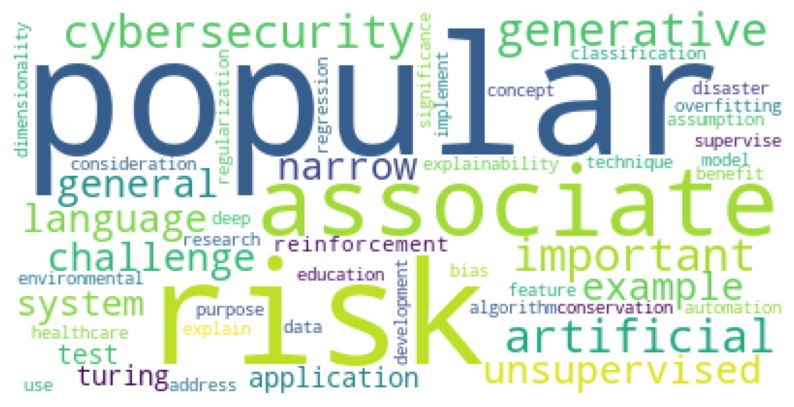

In [28]:
draw_word_cloud(2)